<a href="https://colab.research.google.com/github/dansojo/Medical_CV/blob/main/US_Bilateral_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**목표 : 초음파 특유의 고주파 노이즈(speckle noise)를 감소시키면서도 중요한 경계와 조직 구조를 보존하는 것**

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
# 원본 이미지 로드

image_path = '/content/drive/MyDrive/Medical_CV/Ultrasound (US)/US 이미지/benign (107).png'  # 이미지 경로 설정
us_image = io.imread(image_path, as_gray=True)

In [ ]:
#  원본 이미지 데이터 확인
print(f"Original us_image - Min Value: {us_image.min()}, Max Value: {us_image.max()}")
print(f"Original us_image - Data Type: {us_image.dtype}")
print(f"Original us_image - Shape: {us_image.shape}")

Original us_image - Min Value: 0.0, Max Value: 1.0
Original us_image - Data Type: float64
Original us_image - Shape: (616, 759)


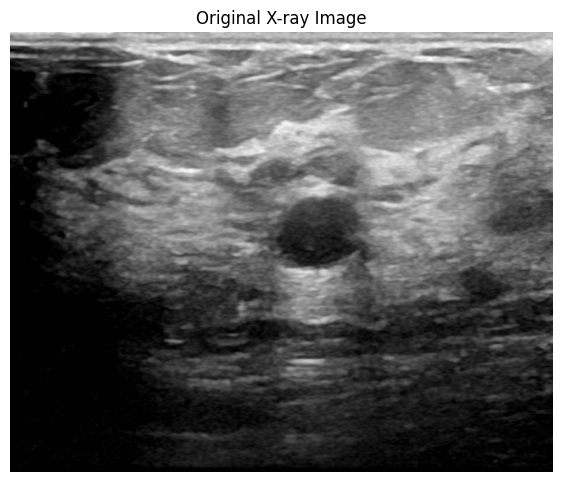

In [ ]:
# 원본 이미지 시각화

plt.figure(figsize=(7, 7))
plt.imshow(us_image, cmap='gray')
plt.title("Original X-ray Image")
plt.axis('off')
plt.show()

In [ ]:
# uint8 형식으로 변환
us_image_uint8 = (us_image * 255).astype('uint8')

In [ ]:
print(f"Original us_image_uint8 - Min Value: {us_image_uint8.min()}, Max Value: {us_image_uint8.max()}")
print(f"Original us_image_uint8 - Data Type: {us_image_uint8.dtype}")
print(f"Original us_image_uint8 - Shape: {us_image_uint8.shape}")

Original us_image_uint8 - Min Value: 0, Max Value: 255
Original us_image_uint8 - Data Type: uint8
Original us_image_uint8 - Shape: (616, 759)


파라미터 설명

In [ ]:
# d : 필터링 지름을 설정하는 파라미터
# sigmaColor : 색상 차이에 대한 감도를 조정하는 파라미터,
#              이 값이 높을수록 색상 차이에 둔감하여 노이즞 제거 효과가 커진다.
# sigmaSpace : 거리 차이에 대한 감도를 조정하는 파라미터,
#              이 값이 높을수록 멀리 떨어진 픽셀들도 영향을 받으므로 경계가 더 부드럽게 보정된다.

In [ ]:
# 3. Bilateral Filtering 적용 (SRAD 대체)
bilateral_filtered_image = cv2.bilateralFilter(us_image_uint8, d=9, sigmaColor=75, sigmaSpace=75)

**전처리 전후 이미지 비교**

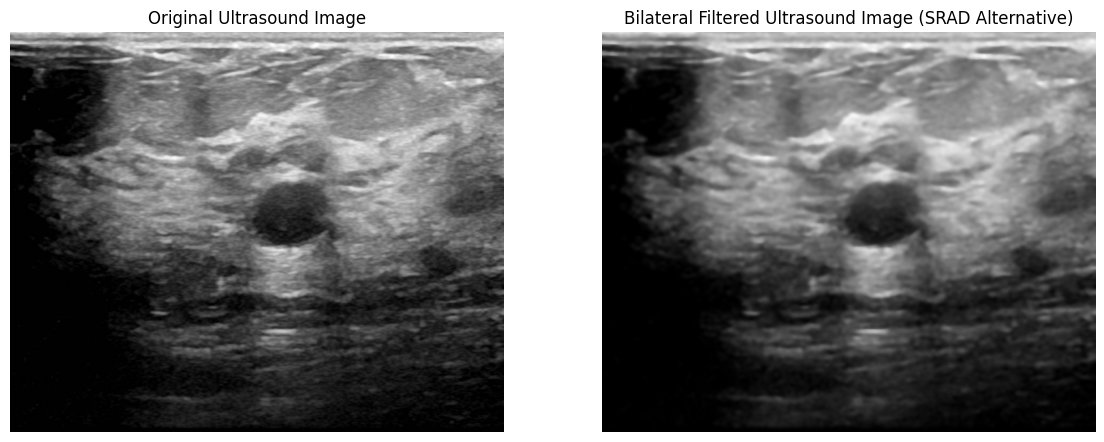

In [ ]:
plt.figure(figsize=(14, 7))

# 원본 초음파 이미지
plt.subplot(1, 2, 1)
plt.imshow(us_image, cmap='gray')
plt.title("Original Ultrasound Image")
plt.axis('off')

# Bilateral Filtering 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.title("Bilateral Filtered Ultrasound Image (SRAD Alternative)")
plt.axis('off')

plt.show()